In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Problem 1

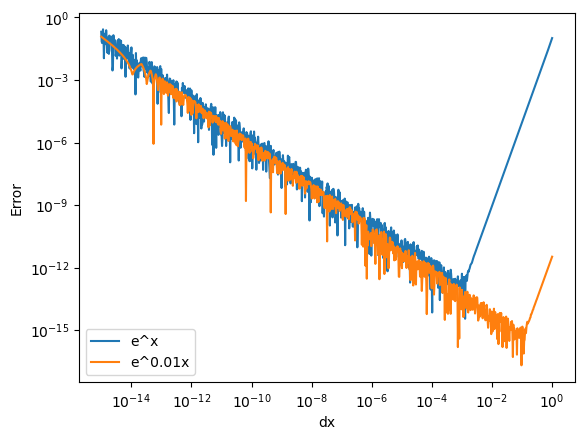

In [23]:
logdx = np.linspace(-15, 0, 1001)
dx = 10**logdx

def func(x):
    return np.exp(x)

def func1(x):
    return np.exp(x*0.01)

x0=1

def derivative(func, x, dx):
    return (func(x+2*dx) - func(x-2*dx) - 8*(func(x+dx) - func(x-dx)))/(-12*dx)

d = derivative(func, x0, dx)
d1 = derivative(func1, x0, dx)

plt.loglog(dx, np.abs(d-func(x0)), label='e^x')
plt.plot(dx, np.abs(d1-(func1(x0)*0.01)), label='e^0.01x') # derivative of e^0.01x is 0.01*e^0.01x
plt.xlabel('dx')
plt.ylabel('Error')
plt.legend()

As we predicted, error is around 10^-1 and 10^-3 for double precision

### Problem 2

In [45]:
def third_der(fun, x, dx):
    return (fun(x+2*dx) - 2*fun(x+dx) + 2*fun(x-dx) - fun(x-2*dx))/(2*dx**3)

def ndiff(fun, x, full=False):
    err = 10**-15
    initialdx = 0.001
    newdx = (np.abs((3*fun(x)*err)/(2*third_der(fun, x, initialdx))))**(1/3)
    diff = np.abs((newdx - initialdx)/newdx)
    while(all(i >= 0.01 for i in diff)):
        temp = (np.abs((3*fun(x)*err)/(2*third_der(fun, x, newdx))))**(1/3)
        diff = np.abs((temp - newdx)/newdx)
        newdx = temp
    d = (fun(x+newdx) - fun(x-newdx))/(2*newdx)
    if(full):
        return d, newdx, np.abs((fun(x)*err)/(2*newdx) + (third_der(fun, x, newdx)*newdx**2)/6)
    return d

In [56]:
x = np.linspace(1,10,10)
d, dx, err = ndiff(np.exp, x, True)
print('derivative:', d, '\n')
print('dx:', dx, '\n')
print('error:', err, '\n')

derivative: [2.71828183e+00 7.38905610e+00 2.00855369e+01 5.45981500e+01
 1.48413159e+02 4.03428793e+02 1.09663316e+03 2.98095799e+03
 8.10308393e+03 2.20264658e+04] 

dx: [1.09464279e-05 1.14407293e-05 1.22030728e-05 1.08595587e-05
 9.79561435e-06 9.79355099e-06 9.95490459e-06 1.05670221e-05
 8.84187971e-06 8.72644700e-06] 

error: [1.85016952e-10 4.91132558e-10 1.18688635e-09 3.76790733e-09
 9.75159476e-09 2.68845047e-08 8.93405943e-08 1.94843274e-07
 5.78227626e-07 2.30428030e-06] 

